In [1]:
import exobengal as ex 

2025-09-27 00:50:31.279833: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-27 00:50:31.280095: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-27 00:50:31.323045: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
params = ex.ExoParams()
params.depth = 0.01
params.period = 3.0
params.duration = 2.0 / 24.0
params.impact = 0.2
params.prad = 0.9
params.slog_g = 4.5
params.teq = 900
params.steff = 5500

In [3]:
detect = ex.DetectExoplanet()

In [4]:
detect.train_cnn(
    data_path="data/cumulative_2025.09.20_12.15.37.csv",
    hidden_layers=[256, 128, 64, 32],
    dropout_rate=0.5,
    optimizer="rmsprop",
    epochs=100,
    batch_size=64,
    patience=10
)

Epoch 1/100


2025-09-27 00:50:33.838807: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


 97/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 0.6415

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6804 - loss: 0.6191 - val_accuracy: 0.7768 - val_loss: 0.5413
Epoch 2/100
117/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7516 - loss: 0.5393

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.5297 - val_accuracy: 0.8160 - val_loss: 0.5243
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7792 - loss: 0.5116 - val_accuracy: 0.8113 - val_loss: 0.5364
Epoch 4/100
110/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.5105

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.5032 - val_accuracy: 0.8202 - val_loss: 0.5218
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.4871

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7924 - loss: 0.5040 - val_accuracy: 0.8123 - val_loss: 0.5216
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7968 - loss: 0.4927 - val_accuracy: 0.8186 - val_loss: 0.5218
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.4773 - val_accuracy: 0.8181 - val_loss: 0.5277
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.4737 - val_accuracy: 0.8238 - val_loss: 0.5232
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8062 - loss: 0.4758 - val_accuracy: 0.8212 - val_loss: 0.5272
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.4776 - val_accuracy: 0.8217 - val_loss: 0.5230
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.4706 - val_accuracy: 0.8244 - val_loss: 0.5224
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8045 - loss: 0.4595 - val_accuracy: 0.8

CNN model saved to /home/kmshariat/Astronomy/ExoBengal/models/cnn_model.h5


In [5]:
detect.cnn(params)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


{'prediction': 'Planet', 'probability': 0.8803210258483887, 'ESI': 0.01}

In [6]:
new_detect = ex.DetectExoplanet()

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       939
           1       0.83      0.82      0.82       974

    accuracy                           0.82      1913
   macro avg       0.82      0.82      0.82      1913
weighted avg       0.82      0.82      0.82      1913



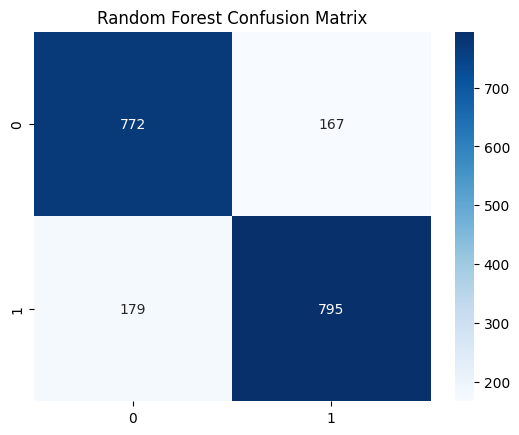

AUC-ROC: 0.90


In [7]:

new_detect.train_random_forest(
    data_path = "data/cumulative_2025.09.20_12.15.37.csv",
    n_estimators=100,
    max_depth=20
)

In [8]:
new_detect.random_forest(params)

{'prediction': 'Planet', 'probability': 0.7221623993758984, 'ESI': 0.01}

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       968
           1       0.76      0.81      0.79       945

    accuracy                           0.78      1913
   macro avg       0.79      0.78      0.78      1913
weighted avg       0.79      0.78      0.78      1913



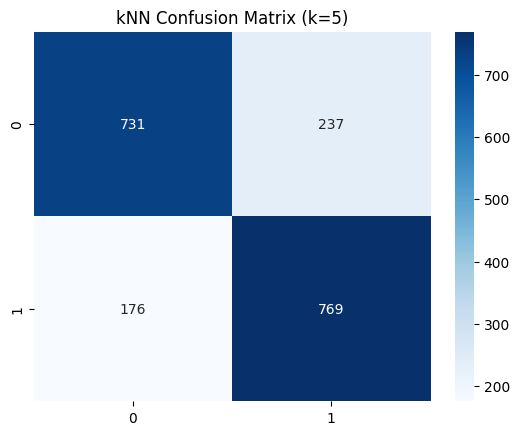

AUC-ROC: 0.86


In [10]:
again_detect = ex.DetectExoplanet()
again_detect.train_knn(data_path="data/cumulative_2025.09.20_12.15.37.csv", n_neighbors=5)

In [11]:
again_detect.knn(params)

{'prediction': 'Planet', 'probability': 1.0, 'ESI': 0.01}

              precision    recall  f1-score   support

           0       0.80      0.72      0.75       632
           1       0.81      0.87      0.84       862

    accuracy                           0.80      1494
   macro avg       0.80      0.79      0.79      1494
weighted avg       0.80      0.80      0.80      1494



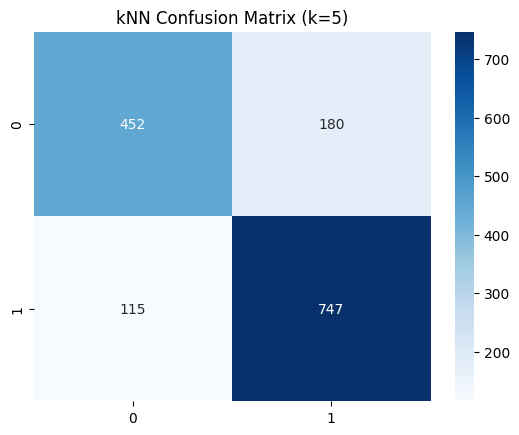

AUC-ROC: 0.86


In [12]:
update_detect = ex.DetectExoplanet()
update_detect.train_knn(data_path="data/q1_q17_dr24_koi_2025.09.21_22.02.00.csv", n_neighbors=5)

In [13]:
update_detect.knn(params)

{'prediction': 'Planet', 'probability': 0.6, 'ESI': 0.015}

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       968
           1       0.79      0.83      0.80       945

    accuracy                           0.80      1913
   macro avg       0.80      0.80      0.80      1913
weighted avg       0.80      0.80      0.80      1913



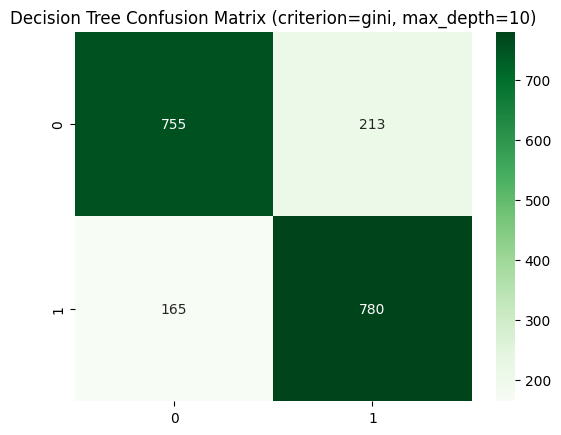

AUC-ROC (Decision Tree): 0.84


In [16]:
another_detect = ex.DetectExoplanet()
another_detect.train_decision_tree(data_path="data/cumulative_2025.09.20_12.15.37.csv", max_depth=10, criterion='gini')

In [20]:
another_detect.decision_tree(params)

{'prediction': 'Planet', 'probability': 0.7957295373665481, 'ESI': 0.01}